In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("Mamaearth.csv")

In [3]:
df.head()

,Product_Name,Product Link,Rating,Reviews,MRP,Pack_Size,Discount,Key_Ingredients,Category,Tokens
0,Tea Tree Facewash for acne & pimples,https://mamaearth.in/product/teatreefacewash,4.8,For baby skin that constantly flaked and dry t...,Rs.249.00,100ml,NaN,Neem Aloe Vera Tea Tree Oil,Face Wash,tea tree facewash acne pimple
1,Anti Hair Fall Kit for complete hair care,https://mamaearth.in/product/antihairfallkit,4.8,With changing weather I tend to get itchy and ...,Rs.1199.00,NaN,(25% off),Bhringraj Oil Biotin All hair type The kit ...,Hair Kit,anti hair fall kit complete hair care
2,Argan Hair Mask with Argan Avocado Oil and Mil...,https://mamaearth.in/product/arganhairmask,4.8,It is the best charcoal face mask i have ever ...,Rs.599.00,200ml,NaN,Argan Oil,Hair Oil,argan hair mask argan avocado oil milk protein...
3,Ubtan Bamboo Sheet Mask with Turmeric & Saffro...,https://mamaearth.in/product/ubtanbamboosheetm...,5.0,Very good product with good customer service,Rs.149.00,25 g,NaN,Turmeric,NaN,ubtan bamboo sheet mask turmeric saffron skin ...
4,Niacinamide Bamboo Sheet Mask with Niacinamide...,https://mamaearth.in/product/niacinamidebamboo...,5.0,Firstly I would like to say that I like all th...,Rs.149.00,25 g,NaN,Niacinamide,NaN,niacinamide bamboo sheet mask niacinamide ging...


In [4]:
data = df[["Product_Name","Tokens"]]
data.head()

,Product_Name,Tokens
0,Tea Tree Facewash for acne & pimples,tea tree facewash acne pimple
1,Anti Hair Fall Kit for complete hair care,anti hair fall kit complete hair care
2,Argan Hair Mask with Argan Avocado Oil and Mil...,argan hair mask argan avocado oil milk protein...
3,Ubtan Bamboo Sheet Mask with Turmeric & Saffro...,ubtan bamboo sheet mask turmeric saffron skin ...
4,Niacinamide Bamboo Sheet Mask with Niacinamide...,niacinamide bamboo sheet mask niacinamide ging...


In [5]:
data = data.drop_duplicates()

In [6]:
token = data['Tokens']

In [7]:
word_count = Counter(''.join(token).split()).most_common(30)

In [8]:
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
print(word_frequency)

           Word  Frequency
0          hair         50
1          face         43
2          skin         41
3             c         34
4           oil         26
5          wash         24
6          mask         22
7          tree         20
8      turmeric         19
9          body         18
10      shampoo         17
11        onion         16
12      vitamin         15
13         fall         13
14          bye         13
15        water         13
16         free         11
17        serum         11
18      control         10
19         deep         10
20       coffee         10
21        cocoa         10
22       bamboo          9
23        cream          9
24  conditioner          9
25         acne          8
26        sheet          8
27        combo          8
28         glow          8
29          tea          7


# Clustering the products

In [9]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(data['Tokens'])

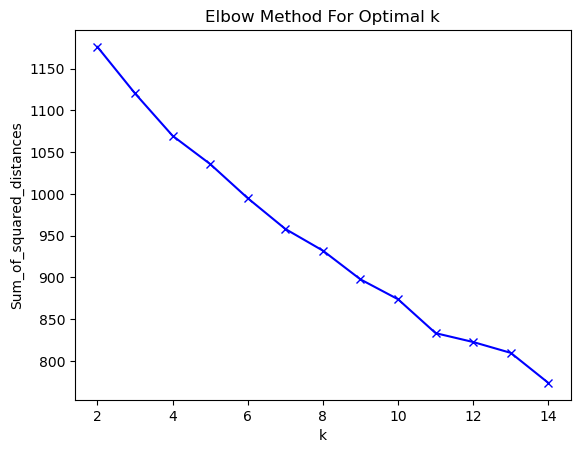

In [10]:
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(count_matrix)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [11]:
true_k = 11
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(count_matrix)
labels=model.labels_
data_clus=pd.DataFrame(list(zip(data['Product_Name'],data['Tokens'],labels)),columns=['Product Name','Tokens','cluster'])
print(data_clus.sort_values(by=['cluster']))

                                          Product Name  \
17   Vitamin C Sleeping Mask with Aloe Vera for Ski...   
160  Vitamin C Bamboo Sheet Mask with Vitamin C & H...   
16   Vitamin C Face Mask With Vitamin C & Kaolin Cl...   
47   Vitamin C Body Wash with Vitamin C & Honey for...   
90   Vitamin C Hand Cream with Vitamin C and Shea B...   
..                                                 ...   
45   Charcoal Body Wash With Charcoal & Mint for De...   
77   Retinol Bamboo Sheet Mask with Retinol & Bakuc...   
127                      Day and Night Face Wash Combo   
100  Hand Sanitizer with Lime & Neem for Killing Ge...   
161  Hydrating Natural Body Lotion with Cucumber & ...   

                                                Tokens  cluster  
17    vitamin c sleep mask aloe vera skin illumination        0  
160  vitamin c bamboo sheet mask vitamin c honey sk...        0  
16   vitamin c face mask vitamin c kaolin clay skin...        0  
47   vitamin c body wash vitamin c hone

Cluster: 0
Titles
Vitamin C Body Lotion with Vitamin C & Honey fo...
Vitamin C Foaming Face Wash with Vitamin C & Tu...
Vitamin C Face Wash with Vitamin C and Turmeric...
Vitamin C Face Cream with Vitamin C & SPF 20 fo...
Vitamin C Face Mask With Vitamin C & Kaolin Cla...
Vitamin C Sleeping Mask with Aloe Vera for Skin...
Vitamin C Face Toner with Vitamin C & Cucumber ...
Skin Illuminate Face Serum for Radiant Skin wit...
Vitamin C Body Wash with Vitamin C & Honey for ...
Vitamin C Face Scrub for Glowing Skin With Vita...
Vitamin C Body Wash with Vitamin C & Honey for ...
Vitamin C Hand Cream with Vitamin C and Shea Bu...
Vitamin C Face Milk with Vitamin C and Peach fo...
Vitamin C Bamboo Sheet Mask with Vitamin C & Ho...


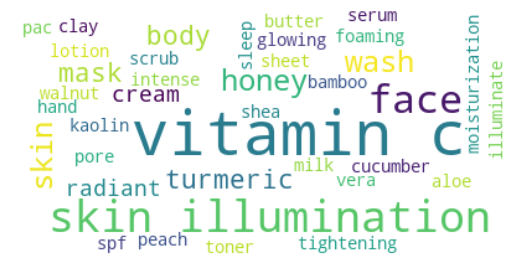

Cluster: 1
Titles
CoCo Body Wash With Coffee & Cocoa For Skin Awa...
CoCo Bamboo Sheet Mask with Coffee & Cocoa for ...
CoCo Face Wash with Coffee & Cocoa for Skin Awa...
CoCo Body Lotion With Coffee and Cocoa for Inte...
CoCo Hand Cream with Coffee & Cocoa for Rich Mo...
CoCo Face Wash with Coffee & Cocoa for Skin Awa...
CoCo Face Scrub with Coffee & Cocoa for Rich Ex...
CoCo Face Mask with Coffee & Cocoa for Skin Awa...
CoCo Yogurt with Coffee and Cocoa for Rich Mois...
Charcoal Face Scrub For Oily Skin & Normal skin...
CoCo Body Butter for Dry Skin with Coffee & Coc...


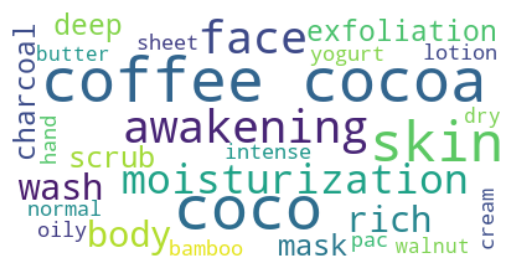

Cluster: 2
Titles
BhringAmla Conditioner with Bhringraj & Amla fo...
BhringAmla Shampoo with Bhringraj & Amla for In...
BhringAmla Hair Oil with Bhringraj & Amla for I...
BhringAmla Hair Mask with Bhringraj & Amla for ...


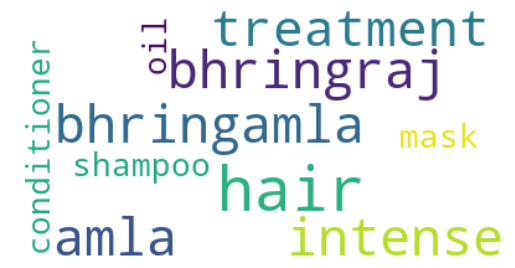

Cluster: 3
Titles
              Tea Tree Facewash for acne & pimples
          Tea Tree Shampoo for Dandruff Free Hair 
Tea Tree Conditioner with Tea Tree & Ginger Oil...
Tea Tree Body Wash With Tea Tree & Neem For Ski...
Tea Tree Body Wash With Tea Tree & Neem For Ski...
Tea Tree Foaming Face Wash with Tea Tree & Sali...
                               Tea Tree Face Serum
Tea Tree Hair Oil with Tea Tree & Ginger Oil fo...
   Tea Tree Face Wash and Charcoal Face Wash Combo
   Tea Tree Facewash for acne and pimples Pack Of 
             Tea Tree AntiDandruff Hair Regime Kit
Neem Face Mask with Neem and Tea Tree for Pimpl...
                  Tea Tree Anti Dandruff Hair Mask


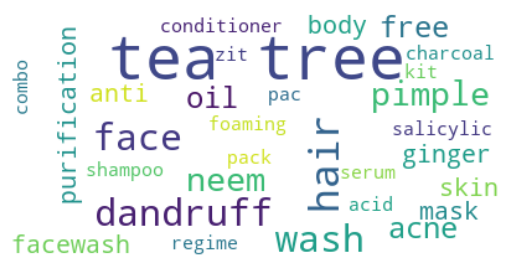

Cluster: 4
Titles
         Anti Hair Fall Kit for complete hair care
          Onion Shampoo and Onion Hair Serum Combo
Onion Shampoo for Hair Growth & Hair Fall Contr...
Onion Scalp Serum with Onion & Niacinamide for ...
Onion Hair Mask For Hair Fall Control With Onio...
         Onion Hair Serum and Onion Hair Oil Combo
Onion Hair Oil for Hair Regrowth & Hair Fall Co...
Onion Hair Serum with Onion & Biotin for Strong...
Onion Shampoo for Hair Growth and Hair Fall Con...
Onion Conditioner for Hair Growth and Hair Fall...
Onion Shampoo for Hair Growth and Hair Fall Con...
Hair Regrowth Combo : Onion Shampoo and Onion C...
Onion Hair Oil for Hair Regrowth and Hair Fall ...
Hair Fall Control Regime Combo: Onion Shampoo 2...
          Onion Hair Oil and Onion Hair Mask Combo
        Onion Hair Serum and Onion Hair Mask Combo
     Root Restore Hair Oil for hair fall reduction


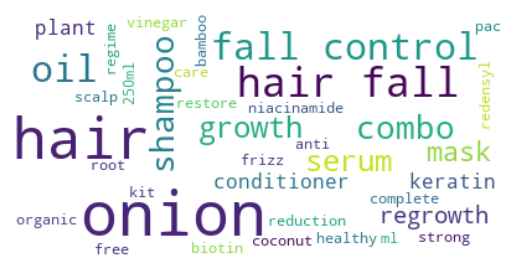

Cluster: 5
Titles
                       Onion Shampoo and Oil Combo
Aloe Vera Gel with Pure Aloe Vera & Vitamin E f...
Rice Hair Oil with Rice Bran & Coconut Oil For ...
                         Hair Fall Reduction Combo
               Argan Shampoo and Conditioner Combo
          BhringAmla Shampoo and Conditioner Combo
Onion Shampoo 400ml and Onion Conditioner 250ml...
         Tea Tree Shampoo and Onion Hair Oil Combo
Castor Oil for Healthier Skin Hair and Nails wi...
Aloe Turmeric Gel for Skin & Hair 300ml (Saver ...
                 Aloe Turmeric Gel for Skin & Hair
Anti Acne Combo: Oil Free Moisturizer and Ultra...
      Healthy Hair Combo : Shampoo and Conditioner
       ProGrowth Hair Tonic for better hair growth
   Happy Heads Shampoo for healthy & stronger hair
    No More Tangles Conditioner for fizz free hair


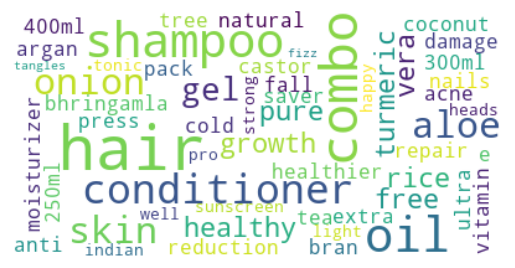

Cluster: 6
Titles
Rice Water Shampoo With Rice Water and Keratin ...
Rice Water Conditioner with Rice Water & Kerati...
Rice Water Bamboo Sheet Mask with Rice Water & ...
Rose Water Bamboo Sheet Mask with Rose Water & ...
Rose Body Lotion with Rose Water and Milk For D...
Rose Face Toner with Witch Hazel & Rose Water f...
Micellar Water Foaming Makeup Remover with Rose...


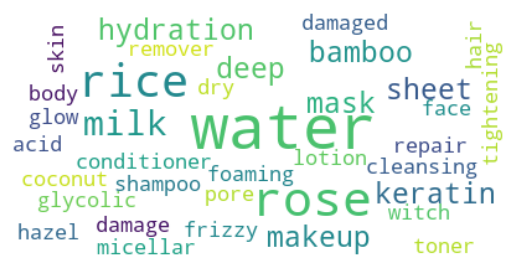

Cluster: 7
Titles
Ubtan Bamboo Sheet Mask with Turmeric & Saffron...
Ubtan Body Lotion with Turmeric & Kokum Butter ...
Ubtan Face Scrub with Turmeric & Walnut for Tan...
Skin Lightening & Brightening Combo : Ubtan Fac...
Ubtan Face Mask with Saffron & Turmeric for Ski...
                   Ubtan Face Wash for Tan Removal
Ubtan Foaming Face Wash with Turmeric & Saffron...
Ubtan Body Wash With Turmeric & Saffron for Glo...
Ubtan Night Face Mask with Turmeric & Niacinami...
Ubtan Hand Cream with Turmeric and Honey for De...
Ubtan Body Scrub with Turmeric & Saffron for Ta...
Ubtan Yogurt with Turmeric and Saffron for Deep...
Ubtan Face Wash and Skin Illuminate Face Serum ...
           Ubtan Facewash for tan removal Pack Of 
Ubtan Body Butter For Dry Skin With Turmeric & ...
AntiPollution Daily Face Cream for Dry and Oily...
Ubtan Body Wash With Turmeric & Saffron for Glo...


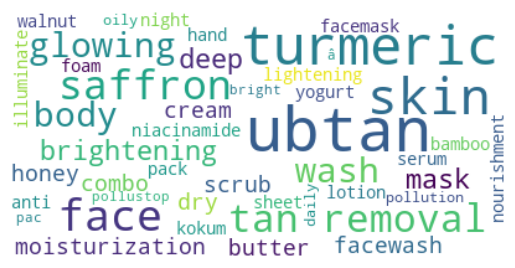

Cluster: 8
Titles
Spotless Skin Combo: Ubtan Facewash  100ml and ...
Bye Bye Dark Circles Eye Cream with Cucumber & ...
Bye Bye Blemishes Face Cream for Reducing Pigme...
Skin Illuminate Face Serum and Bye Bye Dark Cir...
Bye Bye Blemishes 30g and Bye Bye Dark Circles ...
Skin Illuminate Face Serum and Bye Bye Blemishe...
Tea Tree Face Wash and Bye Bye Blemishes 30ml C...


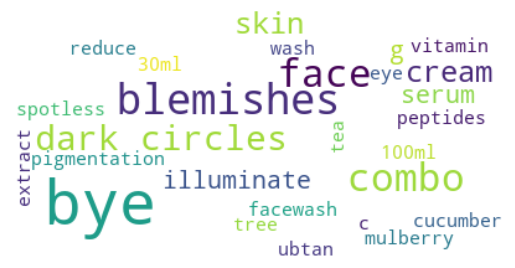

Cluster: 9
Titles
Argan Hair Mask with Argan Avocado Oil and Milk...
Argan Conditioner with Argan & Apple Cider Vine...
Apple Cider Vinegar Foaming Face Wash with Appl...
Argan Hair Oil with Argan Oil & Avocado Oil for...
                   Argan Hair Mask & Argan Shampoo
Argan Shampoo with Argan & Apple Cider Vinegar ...


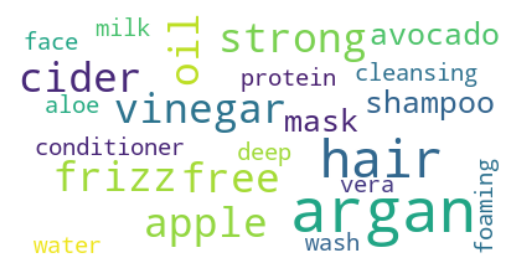

Cluster: 10
Titles
Niacinamide Bamboo Sheet Mask with Niacinamide ...
                                      AntiAcne Kit
                              Hairfall Control Kit
Skin Correct Face Serum with Niacinamide and Gi...
       OilFree Face Moisturizer for AcneProne Skin
Ultra Light Indian Sunscreen with Carrot Seed T...
Charcoal Body Wash With Charcoal & Mint for Dee...
Charcoal Body Wash With Charcoal & Mint for Dee...
Retinol Night Cream For Women with Retinol & Ba...
Retinol Face Wash with Retinol & Bakuchi for Fi...
Niacin Face Toner with Niacinamide & Witch Haze...
                                Retinol Face Serum
                            Complete Skin Glow Kit
                   Coco Intense Skin Awakening Kit
                          Vitamin C Radiance Combo
                      Vitamin C Clear Skin Combo  
                    Vitamin C Skincare Regimen Kit
                        Vitamin C No Make Up Combo
                 Vitamin C Overnight Skin Glow Kit
            

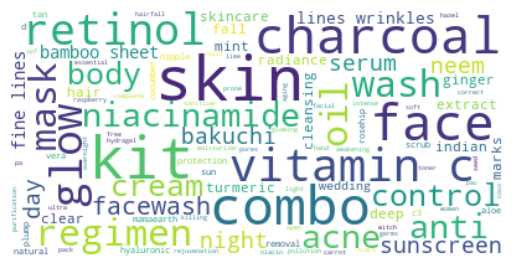

In [12]:
result={'cluster':labels,'data':data['Tokens']}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['data'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=data_clus[data_clus.cluster==k]['Product Name']         
   print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()